In [1]:
import torch
import numpy as np
import scipy
import pytorch_lightning as pl
from tqdm import tqdm
import plotfancy as pf
pf.housestyle_rcparams()
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../../mist-base/GW')
sys.path.append('../../mist-base/')
sys.path.append('../../mist-base/utils')
sys.path.append('../../')

from src.utils.generators import Simulator_Additive
from simulators.utils import *
from utils.data import OnTheFlyDataModule, StoredDataModule
from utils.module import CustomLossModule_withBounds, BCELossModule

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

mycolors = ['#570f6d', '#bb3754', '#f98e08']

Loading data for H1 at GPS time 1126259462.4
Loading PSD for H1 at GPS time 1126259462.4 [can take O(1 min)]
Loading posterior samples from ../../mist-base/GW/GW150814_posterior_samples.npz
the number of bins is 924


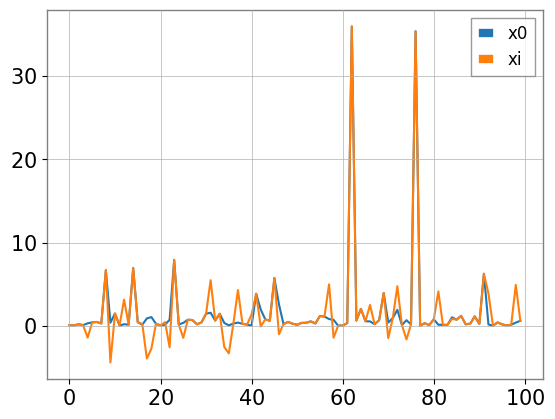

In [2]:
Nsims = 10_000
Nbins = 100
SIGMA = 1 # Likelihood covariance \Sigma = sigma * \mathbb{1}
simulator = Simulator_Additive(Nbins=Nbins, sigma=SIGMA, bounds=5, fraction=0.2, bkg=True, dtype=torch.float64, mode='gw')     
Nbins=simulator.Nbins
samples = simulator.sample(Nsims=Nsims)  

plt.plot(samples['x0'][0][500:600], label='x0')
plt.plot(samples['xi'][0][500:600], label='xi')
# idx = torch.where(samples['ni'][0] != 0)
# plt.scatter(idx, samples['xi'][0][idx], marker='x', s=50)
plt.legend();

In [3]:
simulator.grid.shape

torch.Size([924])

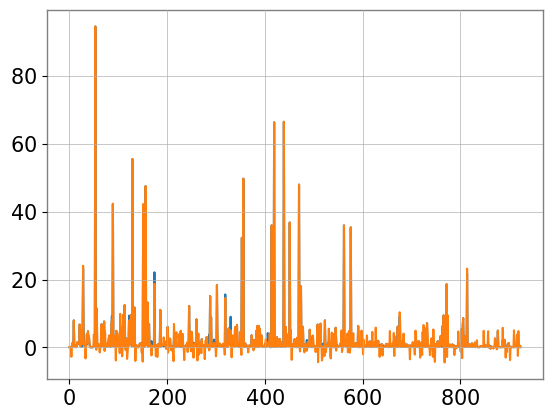

In [4]:

plt.plot(samples['x0'][0])
s =(samples['epsilon'][0])
x = (samples['x0'][0])
plt.plot((s+x))
# plt.plot(s*(s>0))
# plt.yscale('log')


/tmp/ipykernel_906407/1126275446.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_min = np.log10(min(data[data > 0]))  # avoid log(0)
/tmp/ipykernel_906407/1126275446.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_max = np.log10(max(data))


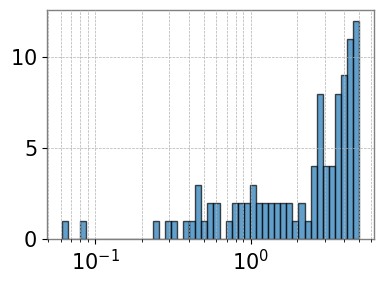

In [5]:
data = samples['epsilon'][0]
num_bins = 50
log_min = np.log10(min(data[data > 0]))  # avoid log(0)
log_max = np.log10(max(data))
bins = np.logspace(log_min, log_max, num_bins)

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('linear')  # change to 'log' if you want a log-log histogram
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

In [6]:
import gw150814_simulator as gs
default = gs.defaults
default['posterior_samples_path'] = '../../mist-base/GW/GW150814_posterior_samples.npz'
gw = gs.GW150814(settings=default)

Loading data for H1 at GPS time 1126259462.4
Loading PSD for H1 at GPS time 1126259462.4 [can take O(1 min)]
Loading posterior samples from ../../mist-base/GW/GW150814_posterior_samples.npz


In [7]:
gw.delta_f

Array(0.25, dtype=float64)

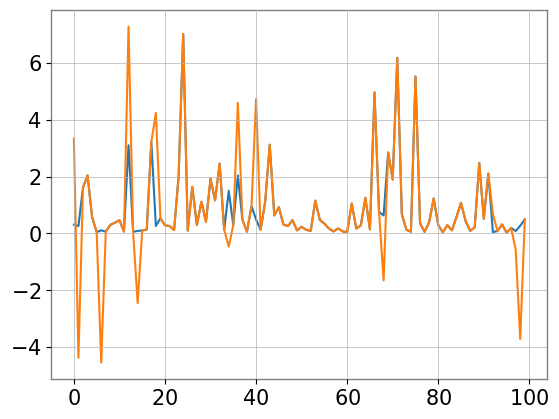

In [7]:

plt.plot(samples['x0'][0][500:600], label='x0')
plt.plot(samples['xi'][0][500:600], label='xi')

In [10]:
simulator.get_mu(simulator.get_theta(1)).shape

torch.Size([1, 8193])